## Start of chapter 3

In [45]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
# %matplotlib inline

In [35]:
print(torch.cuda.is_available())

False


In [36]:
weight=0.7
bias=0.3
start=0
end=1
step=0.02
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias
# x[:10],y[:10],len(x),len(y),x.shape,y.shape,len(y)

the ratio between the traning set and the validation set is <br>
*traning set : 60%-80%<br>
*validation set : 10%-20%<br>
*test set : 10%-20%<br>

In [37]:
train_split=int(0.8*len(x))
x_train=x[:train_split]
y_train=y[:train_split]
x_test=x[train_split:]
y_test=y[train_split:]
len(x_train),len(x_test),len(y_train),len(y_test)
# print(x_train)
# print(y_train)
# print(x_test)
# print(y_test)



(40, 10, 40, 10)

In [38]:
df=pd.read_csv('all_fuels_data.csv')
df['diff']=df['open']-df['close']
df.head()

,ticker,commodity,date,open,high,low,close,volume,diff
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385,-0.099998
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978,0.270000
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601,-0.349998
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770,-0.829998
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131,0.099998


In [39]:
#count each value in the commodities column are there in the dataset and convert it to precentage
df['commodity'].value_counts(normalize=True)
#do the same for ticker column
df['ticker'].value_counts(normalize=True)

CL=F    0.213667
NG=F    0.213519
HO=F    0.213407
RB=F    0.211963
BZ=F    0.147444
Name: ticker, dtype: float64

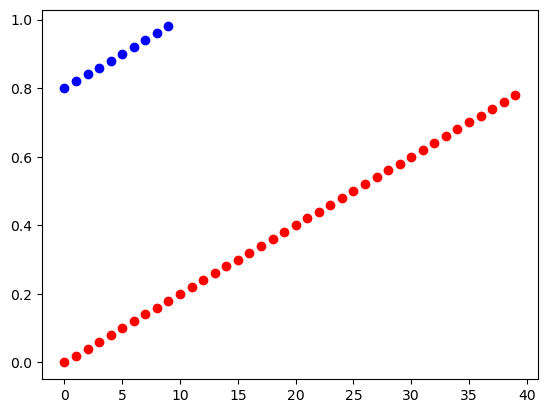

In [40]:
plt.plot(x_train, 'ro', label='Original data')
plt.plot(x_test, 'bo', label='Original data')

In [47]:
x_train,y_train,x_test,y_test =train_test_split(x,y,test_size=0.2)

In [51]:
y_test

tensor([[0.7900],
        [0.4540],
        [0.8180],
        [0.8600],
        [0.4960],
        [0.9860],
        [0.3700],
        [0.7060],
        [0.7200],
        [0.4260]])

In [53]:
#create a scatter plot of the data
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.weights = nn.Parameter(torch.randn(input_dim, output_dim, requires_grad=True, dtype=torch.float32))

    def forward(self, x):
        return torch.matmul(x, self.weights)